# ipywidgets
[ipywidgets](https://github.com/ipython/ipywidgets)を使うとJupyter上でインタラクティブにパラメータを変えた結果を表示できます。

- Python 2.7.11 on OSX 10.11.3
- IPython 4.10.0rc2
- ipywidgets 4.1.1

で確認しています。Jupyterや周辺モジュールは結構大胆にモジュール構成や記述方法を変えるので、バージョンに注意してください。

まず初期設定。backendにnbaggを指定するとよいです。うそです。バギーなのでやめたほうがよさそうです。ひとまずはinlineでやりましょう。

In [1]:
from ipywidgets import interact
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

関数を定義します。

In [2]:
t=np.linspace(0,10,1000)
def f(x=0.0):
    y=np.sin(t*x)
    plt.ylim(-1,1)
    plt.plot(t,y)


interact()で関数と、インタラクティブ引数を指定します。min, max, step で指定します。

デフォルトのUIはスライドバーです。

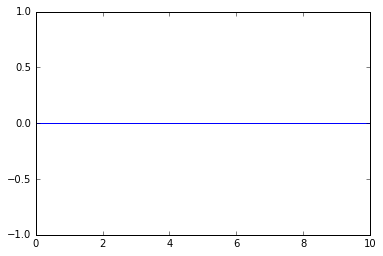

In [3]:
interact(f, x=(0.0,2.0,0.01));

ドロップダウン選択もできます。この例ではテキストを与えています。

戻り値を"_"で受け取っているのは、interact()の戻り値をJupyterが表示してしまうのを防ぐためです。

In [4]:
def ft(text=""):
    print text
_=interact(ft,text=["a","b","c"])

a


 テキストボックスも作れます。一文字変更するたびに関数が呼ばれますので少々うざいです。

In [5]:
_=interact(ft,text="a")

a


スライドバー、ドロップダウン、テキストボックス、以外はipywidgetsクラスにいろいろと定義されています。

以上３つはよく使うので少ないコードで使えるように工夫されているようですね。

In [6]:
import ipywidgets as widget

In [7]:
def fc(check=False):
    print check
_=interact(fc,check=widget.Checkbox())

False


In [8]:
_=interact(ft,text=widget.RadioButtons(options=["a","b","c"]))

a


In [9]:
_=interact(ft,text=widget.ToggleButtons(options=["a","b","c"]))

a


<IPython.core.display.Javascript object>


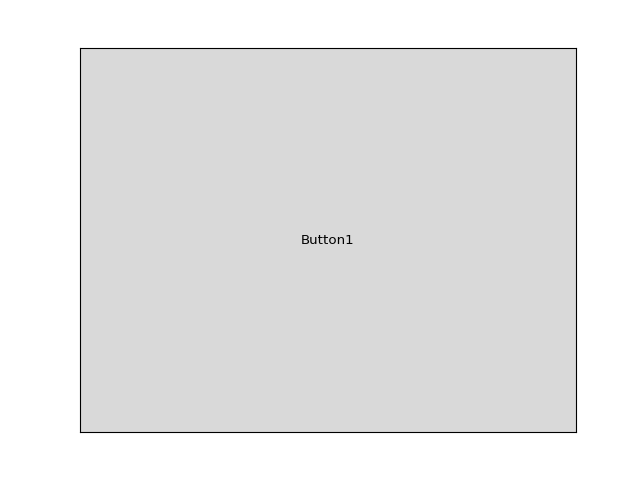

In [10]:
%matplotlib nbagg
from matplotlib.widgets import Button
import matplotlib.pyplot as plt
def callback(event):
    plt.text(event.xdata, event.ydata, 'clicked')

f,a = plt.subplots(1)
b1 = Button(a,'Button1')
b1.on_clicked(callback)
plt.show()